$$\require{mhchem}$$

# Python/latex practice (2 pts)


## Review the materials we discussed in class on [Wednesday](https://nbviewer.jupyter.org/github/zulissi/f18-06625/blob/master/rxns-book/introduction.ipynb?flush_cache=True).  Look over  scipy.optimize,  scipy.minimize, and np.array modules.  Post at least one question on piazza about the concepts/examples/tutorials that you find confusing.

## The Fibonacci sequence is defined such that each number is the sum of the two previous numbers in the sequence, starting with [1, 1, 2, 3, 5...]. Generate the first 15 elements in the sequence in Python, with the final result as a [list](https://www.tutorialspoint.com/python/python_lists.htm).

In [1]:
sum = 0
y = 1                      # This is the first number of the list  
lst = [y,]                 # defining a list to contain all the numbers 
def fibonacci(n):          # function definition 
    x = 0    
    y = 1
    for i in range(0,n-1):  
        sum = x + y
        data = sum          
        x = y
        y = sum
        lst.append(data)   #listing all the numbers 
fibonacci(15)
print(lst)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]


### Bonus (1pt) write a fibonacci generator as a recursive function

In [2]:
n = int(input("Enter the lenght of the series "))  #user input
def rb(n):                                #Function definition
    if n <= 1: 
        return n
    else:
        return(rb(n-1) + rb(n-2))

print("Fibonacci sequence:")
for i in range(1,n+1):
    print(rb(i)) 

Enter the lenght of the series 5
Fibonacci sequence:
1
1
2
3
5


## Type-set 5 latex equations.  Choose the 5 most complicated equations you have seen so far in your other classes (or from your undergrad courses) and typeset them here.

### 1. Bernoulli's Equation
\begin{equation} p + 0.5*\rho*V^2 + \rho*g*h = cosntant \end{equation}

### 2. Navier Stokes Equation
\begin{equation} \rho*(\frac{\partial u}{\partial x} + u.\triangledown u) =
-\triangledown\bar{p} + \mu \triangledown ^{2}u + 1/3 \mu \triangledown 
(\triangledown .u) + \rho g \end{equation}

### 3. Knudsen Equation
\begin{equation} q = 1/6 \sqrt{2\Pi }\bigtriangleup P
\frac{d^{3}}{l\sqrt{\rho _{1}}} \end{equation}

### 4. Newtons method
\begin{equation} x_{n+1} = x_{n} - \frac{f(x_{n})}{{f}'(x_{n})} 
                                                   \end{equation}

### 5. Eulers method
\begin{equation} \frac{\partial p}{\partial t} + \triangledown .(\rho u) 
                                                   = 0 \end{equation}

# Problem 1:  Reaction extent (5 pt)

## Problem 1A
Ammonia has been proposed as a chemical to store hydrogen for a hydrogen fuel cell due its favorable volumetric hydrogen density. Write down the stoichiometric vector for the thermal decomposition of ammonia to nitrogen and hydrogen.

$\ce{2NH3 -> N2 + 3H2}$

In [7]:
import numpy as np
a = np.array([-2,1,3])          #The reaction is 2NH3 -> N2 + 3H2 
print(a)          #Displays the stoichiometric vector for the above equation

[-2  1  3]


## Problem 1B
Suppose that we know the initial gas concentration of ammonia in a tank is 100 mol/L, and the fractional reaction extent proceeds as $\Xi=(1-e^{-3t^2})$ where $t$ is the time in seconds.  Plot the concentration of ammonia, nitrogen, and hydrogen as a function of time over the first 2 seconds.  Label the plot with a legend to indicate the species.  

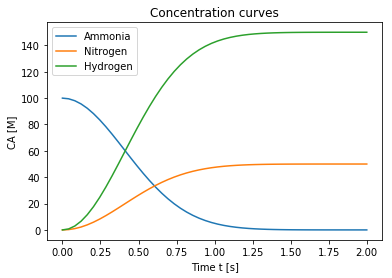

In [16]:
import numpy as np
import matplotlib.pyplot as plt
def CaAmmonia(t):                      #concentration of ammonia w.r.t time
    return 100 * np.exp(-3 * t**2)
def CaNitrogen(t):                     #concentration of nitrogen w.r.t time
    return 50 * (1 - np.exp(-3 * t**2))
def CaHydrogen(t):                      #concentration of hydrogen w.r.t time
    return 150 * (1 - np.exp(-3 * t**2))
t = np.linspace(0,2,50)
plt.plot(t,CaAmmonia(t))
plt.plot(t,CaNitrogen(t))
plt.plot(t,CaHydrogen(t))
plt.xlabel('Time t [s]')
plt.ylabel('CA [M]') 
plt.title("Concentration curves")
plt.legend(['Ammonia','Nitrogen','Hydrogen'])
plt.show()

## Problem 1C
The operator is worried that if the reaction continues to full extent the increase in the number of moles will drive the pressure too high.  Calculate the time it will take to achieve a 50% higher pressure in the reactor (assuming ideal gas) due to the increase in the number of moles, using fsolve.

In [10]:
import numpy as np
from scipy.optimize import fsolve
C0 = 100
def c(t):                               #concentration of ammonia w.r.t time
    return C0 * (1 + np.exp(-3 * t**2))
def f(t):
    return 150 - c(t)
ans = fsolve(f,0.5,full_output=0)
print(f'The value of time at which the pressure rises by 50% is {ans}s')

The value of time at which the pressure rises by 50% is [0.48067563]s


# Problem 2:  Stoichiometry of reaction systems (3 pt)

Consider the following set of chemical reactions:

\begin{equation*}
\ce{H2 + Br2 <=> 2HBr}\\
\ce{Br2 <=> 2Br}\\
\ce{Br+H2 <=> HBr+H}\\
\ce{H+Br2 <=> HBr+Br}\\
\ce{H+HBr <=> H2+Br}\\
\ce{2Br <=> Br2}
\end{equation*}



## Determine the stoichiometric matrix $\nu$, the species list $A$ for this reaction system (in text)

Write A here:

In [11]:

A = [[-1,-1,2,0,0], [0,-1,0,2,0], [-1,0,1,-1,1], [0,-1,1,1,-1], [1,0,-1,1,-1],
     [0,1,0,-2,0]]

A

[[-1, -1, 2, 0, 0],
 [0, -1, 0, 2, 0],
 [-1, 0, 1, -1, 1],
 [0, -1, 1, 1, -1],
 [1, 0, -1, 1, -1],
 [0, 1, 0, -2, 0]]

## Determine the vector of molecular weights $MW$ and verify that all of the equations you have written obey mass balance

In [12]:
import numpy as np
A = [[-1,-1,2,0,0], [0,-1,0,2,0], [-1,0,1,-1,1], [0,-1,1,1,-1], [1,0,-1,1,-1],
     [0,1,0,-2,0]]
MA = [[2],[160],[81],[80],[1]]
b = np.dot(A,MA)
if np.any(b)==0:
    print("All the equations obey mass balance")
else:
    print("All equations do not obey mass balance")

All the equations obey mass balance


## Determine the rank of the matrix using numpy or scipy. How many reactions are linearly independent?

In [13]:
A = [[-1,-1,2,0,0], [0,-1,0,2,0], [-1,0,1,-1,1], [0,-1,1,1,-1], [1,0,-1,1,-1],
     [0,1,0,-2,0]]
import numpy as np
np.linalg.matrix_rank(A)  #Tells the number of linearly independent eqns

3

## Now that you have found the number of independent reactions $n_i$, which $n_i$ of the original set of six reactions can be chosen as an independent set? Try guessing some set of $n_i$ reactions and determine the rank of the new stoichiometric matrix. Stop when you have determined successfully one or more sets of $n_i$ independent reactions.

In [14]:
import numpy as np
A = [[-1,-1,2,0,0], [0,-1,0,2,0], [-1,0,1,-1,1], [0,-1,1,1,-1], [1,0,-1,1,-1],
     [0,1,0,-2,0]]
#The rank of above matrix is 3. 
#This implies that there are 3 linearly independent equations
#By assuming any 3 eqns and checking the rank of the matrix we can obtain 
#the independent equations
B = [[-1,-1,2,0,0], [0,-1,0,2,0], [-1,0,1,-1,1]]
np.linalg.matrix_rank(B)     #The rank is 3
#Hence the first three equations are linearly independent

3

# How long did it take you to complete this assignment?

8 hours